In [1]:
import numpy as np
import scipy.integrate as scpi
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy.random as npr
import os

import euler_forward as ef
import force_functions as ff
import cbmos_serial as cbmos
import cell as cl

plt.style.use('seaborn-whitegrid')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6.75, 5),
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
plt.rcParams.update(params)

In [2]:
# Simulation parameters
s = 1.0    # rest length
tf = 37.0  # final time
rA = 1.5   # maximum interaction distance

params = {"mu": 6.91, "s": s, "rA": rA}
t_data = np.linspace(0, tf, 100)

In [3]:
solver = cbmos.CBMSolver(ff.cubic, ef.solve_ivp, 1)

## Fixed division times

In [4]:
cell_list = [cl.Cell(0, [0], -6.0, True, lambda t: 6 + t)]

In [5]:
os.remove('step_sizes.txt')
os.remove('step_sizes_local.txt')
os.remove('time_points.txt')

In [6]:
history = solver.simulate(cell_list, t_data, {}, {'local_adaptivity':True})

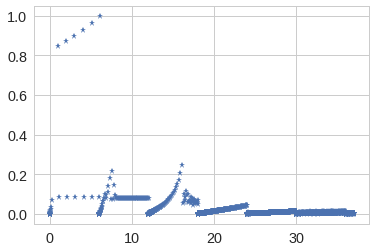

In [7]:
dts = np.loadtxt('step_sizes.txt')
ts = np.loadtxt('time_points.txt')
dts_local = np.loadtxt('step_sizes_local.txt')
plt.plot(ts, dts, '*')



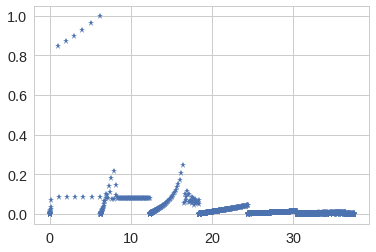

In [14]:
plt.plot(np.cumsum(dts_local), dts_local, '*')

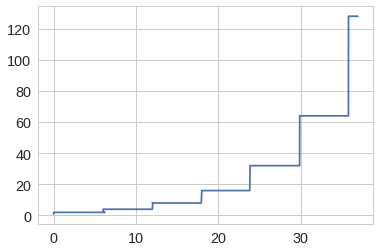

In [9]:
plt.plot(ts[:len(history)], [len(clt) for clt in history])

## Normally distributed division times

In [10]:
cell_list = [cl.Cell(0, [0], -6.0, True, lambda t: npr.normal(6 + t))]

In [11]:
os.remove('step_sizes.txt')
os.remove('time_points.txt')

history = solver.simulate(cell_list, t_data, {}, {'local_adaptivity':True})

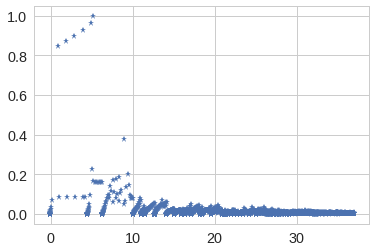

In [12]:
dts = np.loadtxt('step_sizes.txt')
ts = np.loadtxt('time_points.txt')
plt.plot(ts, dts, '*')

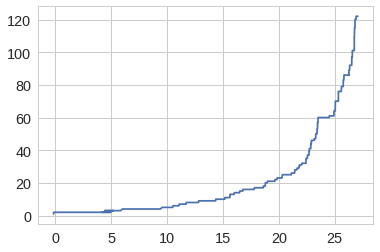

In [13]:
plt.plot(ts[:len(history)], [len(clt) for clt in history])